<a href="https://colab.research.google.com/github/Giovannisb/Portifolio_data_science/blob/master/Analisando_a_viol%C3%AAncia_no_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

Infelizmente o Brasil sofre com crises não só no âmbito político, mas no que se diz respeito a saúde, segurança e educação. Neste notebook irei tratar de uma anáçise de dados sobre a segurança e infelizmente, quando nós citamos esse assunto, o estado do Rio de Janeiro é citado como referência em insegurança, crimes e mortes.

## Obtenção dos Dados

 Irei utilizar a base de dados do Instituto de segurança públilca do estado do Rio de Janeiro. São dados abertos onde qualquer pessoa pode ter acesso a eles.

### Importando os dados

Além de importar os dados, irei também, utilizar algumas bibliotecas para me auxiliar na análise como o `Pandas`, `Matplotlib` e o `Seaborn`.

Também a irei montar um `DataFrame` que consiste em uma estrutura para facilitar a leitura dos atributos.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Antes de iniciar qualquer análise, iremos verificar a cara do nosso dataset, analisando as 5 primeiras e últimas entradas.

In [44]:
#imprimindo as 5 primeiras linhas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [45]:
#imprimindo as 5 últimas linhas
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


In [46]:
#identificando o tamanho do dataframe
df.shape

(344, 56)

In [0]:
df.dtypes

In [48]:
#descobrindo os nomes das culunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Nosso DataFrame tem 344 entradas com 56 colunas, nos quais cada coluna é referente ao ano, mês e o total de cada crime ocorrido naquele período. Há dados faltantes, principalmente nos primeiros anos. Os dados estão agrupados em uma sequência de acordo com o ano e o mês dos crimes ocorridos e os tipos de dados são em sua totalidade numéricos


In [90]:
(df.isnull().sum() / df.shape[0]) * 100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000


Para termos uma referência melhor desses dados faltantes, utilizo uma função para retornar os dados faltantes e faço um calculo para ter uma porcentagem. Para termos uma ideia, nas colunas que são referentes aos roubos e furtos de biciletas, temos aproximadamente 80,2% de dados faltantes. Estupro com 41%. e os crimes conhecidos como saidinhas de banco, aparecem em seguida com mais de 40% dos dados nulos.

## Informações Estatísticas da roubo e furto de veículos no Rio de Janeiro

nesta etapa irei extrair os dados e apresenta-los de forma mais clara. A primeira etapa é obter um resumo estatísticos das variáveis do DataFrame.



In [50]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Com esse resumo, podemos ter noção da distribuição dos dados, como média, mediana, valores mínimos e máximos e outros dados estatísticos, como quais são os valores que estão dentro dos 25%, 50% e 75% dos dados das variáveis do DataFrame.
Nossa próxima etapa irei pegar apenas os dados do ano de 2019, por ser o ano mais próximo porém, não está com os dados completos, faltando o ultimo trimestre do ano.

In [51]:
#filtro por ano
ano = 2019
df_2019 = df.loc[(df['vano']) == ano]
df_2019

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
336,2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3
337,2019,2,323,5.0,8,145.0,450,5210,440.0,157.0,2045.0,411,116,3554,645,7000,1356,4,1.0,2111.0,14.0,60.0,14.0,2124,17410,1344,1889,685.0,1613.0,158.0,7315,13004,0.0,144.0,7.0,3089.0,2090,798.0,1126.0,202.0,2556,3072.0,559.0,1392.0,235.0,4904.0,351.0,37,4.0,4.0,0.0,481,10467,3554,64967.0,3
338,2019,3,344,5.0,11,132.0,590,5902,469.0,160.0,2157.0,497,95,3775,638,7734,1532,1,4.0,2626.0,5.0,88.0,16.0,2547,19558,1364,2757,634.0,1889.0,202.0,8549,15395,0.0,159.0,6.0,3004.0,1941,740.0,1053.0,181.0,2470,3026.0,618.0,1392.0,306.0,5571.0,407.0,29,2.0,2.0,0.0,492,11892,3775,72100.0,3
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Com esse "filtro" aplicado, vamos extrair informações deste DataFrame reduzido. Como são muitos crimes categorizados, vamos olhar estatisticamente apenas três para facilitar a visualização desses dados. Irei analisar as culunas:
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`

Essas colunas são referentes aos roubos e furtos de carros e quantos foram recuperados.

In [64]:
df_2019 = df_2019[['mes','roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']]
df_2019

,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos
mes,,,,
336,1,3785,1415,2810
337,2,3554,1344,2556
338,3,3775,1364,2470
339,4,3755,1244,2624
340,5,3649,1480,2450
341,6,3115,1251,2041
342,7,3198,1353,2355
343,8,3181,1361,2081


In [83]:
df_2019.describe()

,mes,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,8.00000,8.00000,8.000000,8.000000
mean,4.50000,3501.50000,1351.500000,2423.375000
std,2.44949,289.86795,77.924872,261.399496
min,1.00000,3115.00000,1244.000000,2041.000000
25%,2.75000,3193.75000,1320.750000,2286.500000
50%,4.50000,3601.50000,1357.000000,2460.000000
75%,6.25000,3760.00000,1376.750000,2573.000000
max,8.00000,3785.00000,1480.000000,2810.000000


Fazendo uma breve análise dos dados através do uso da função `describe`, vemos que não existem *outliers*, já que seus valores máximos são bem próximo ao valor máximo dos 75% dos dados do DataFrame. 

Uma média de 3501.5 veículos roubados por mês


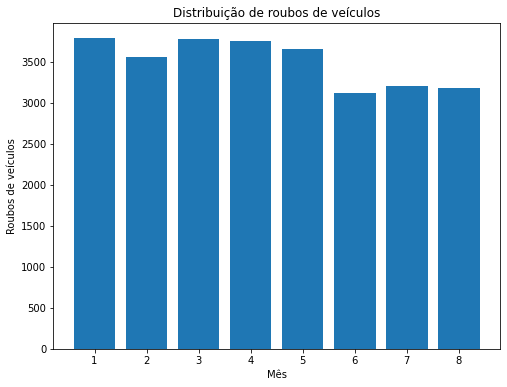

In [53]:
crime = df_2019['roubo_veiculo']
mes = df_2019['mes']

x = mes
y = crime

plt.figure(figsize=(8, 6));
plt.bar(x, y);

plt.title('Distribuição de roubos de veículos')
plt.xlabel('Mês')
plt.ylabel('Roubos de veículos')
plt.xticks(x); # obriga a mostrar todos os números no eixo x

media = df_2019.roubo_veiculo.mean()
print("Uma média de {}".format(media), "veículos roubados por mês")

In [84]:
df_2019.roubo_veiculo.max()

3785

No mês de janeiro vemos o maior número de roubos de carros, 3785 veículos.

Uma média de 1351.5 veículos furtados por mês


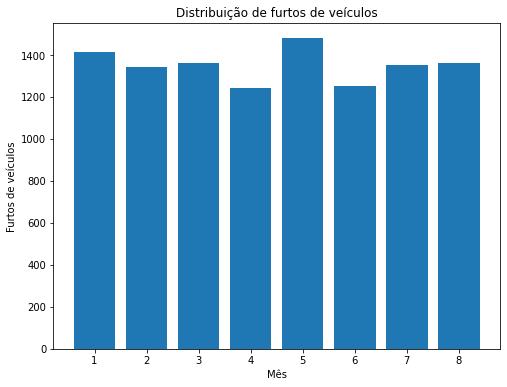

In [54]:
crime = df_2019['furto_veiculos']
mes = df_2019['mes']

x = mes
y = crime

plt.figure(figsize=(8, 6));
plt.bar(x, y);

plt.title('Distribuição de furtos de veículos')
plt.xlabel('Mês')
plt.ylabel('Furtos de veículos')
plt.xticks(x); # obriga a mostrar todos os números no eixo x

media = df_2019.furto_veiculos.mean()
print("Uma média de {}".format(media), "veículos furtados por mês")

In [85]:
df_2019.furto_veiculos.max()

1480

Já em furtos, o maior número é em maio, com 1480 veículos furtados.

Uma média de 2423.375 veículos recuperados por mês


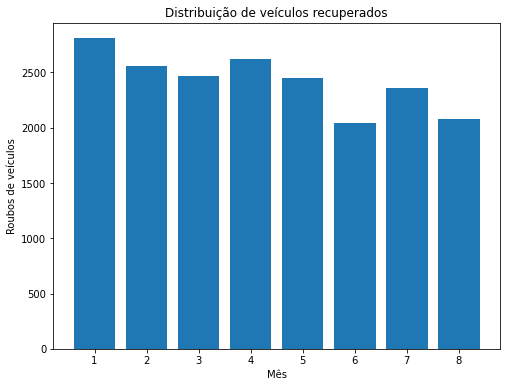

In [55]:
crime = df_2019['recuperacao_veiculos']
mes = df_2019['mes']

x = mes
y = crime

plt.figure(figsize=(8, 6));
plt.bar(x, y);

plt.title('Distribuição de veículos recuperados')
plt.xlabel('Mês')
plt.ylabel('Roubos de veículos')
plt.xticks(x); # obriga a mostrar todos os números no eixo x

media = df_2019.recuperacao_veiculos.mean()
print("Uma média de {}".format(media), "veículos recuperados por mês")

In [86]:
df_2019.recuperacao_veiculos.max()

2810

Janeiro também foi o mês com mais veículos recuperados, um total de 2810 veículos

Uma taxa média de 49.86 % veículos recuperados por mês


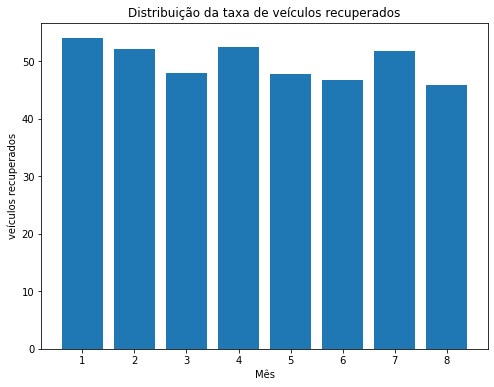

In [82]:
crime = df_2019['recuperacao_veiculos']
mes = df_2019['mes']

taxa = (df_2019.recuperacao_veiculos / (df_2019.furto_veiculos + df_2019.roubo_veiculo)) * 100

x = mes
y = taxa

plt.figure(figsize=(8, 6));
plt.bar(x, y);

plt.title('Distribuição da taxa de veículos recuperados')
plt.xlabel('Mês')
plt.ylabel('veículos recuperados')
plt.xticks(x); # obriga a mostrar todos os números no eixo x

media = taxa.mean()
print("Uma taxa média de %.2f"%(media), "% veículos recuperados por mês")

Observando os gráficos, temos que os roubos e furtos de veículos seguem uma tenência de constância, enquanto o de recuperação, tem uma leve queda conforme os meses passam, assim como sua taxa de recuperação calculada através da equação:
 $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

Chegamos a um valor de 49.86% de veículos recuperados nos 8 meses de registros do ano de 2019.

## Conclusão

Ao analisar os dados referentes aos roubos e furtos de carros no estado, vemos que os números de casos ocorridos seguem uma constância, enquanto o número de veículos recuperados tem umaa leve queda levando a uma taxa de veículos recuperados menor que 50%. 